In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LearningCurveDisplay, learning_curve, train_test_split
from sklearn.metrics import mean_squared_error, f1_score
from numpy import linspace, mean
import plotly.express as px

### Carregar os Dados - Regressão Linear

In [3]:
# Carregar o conjunto de dados
df = pd.read_csv('./datasets/dataset_colesterol.csv')

In [4]:
# Visualizar estrutura do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [5]:
# Ajustar DataFrame

# Remover a coluna 'Id'
df.drop('Id', axis=1, inplace=True)

# Aplicar OneHotEncoding nas variáveis Grupo Sanguíneo, Fumante, Nível de Atividade
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

### Treinar Modelo de Regressão Linear, visualizando a curva de aprendizado

In [6]:
# Separar X e y
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [7]:
# Criar o modelo
model_reg = LinearRegression()

In [45]:
# Gerar Scores da Curva de Aprendizado
train_size_abs, train_scores, test_scores = learning_curve(model_reg, X, y, train_sizes=linspace(0.1, 0.9, 9), scoring='neg_mean_squared_error', cv=3)

In [46]:
train_scores

array([[-47.58887954, -76.59138285, -76.59138285],
       [-54.96739056, -89.25681102, -89.25681102],
       [-61.46083982, -82.38125138, -82.38125138],
       [-66.03559246, -81.29023664, -81.29023664],
       [-64.83075138, -83.09325911, -83.09325911],
       [-63.76047578, -78.42545716, -79.28096061],
       [-65.70536361, -78.33851189, -76.7243984 ],
       [-66.88782412, -77.49207795, -76.58744367],
       [-70.3254912 , -79.61395088, -76.84383826]])

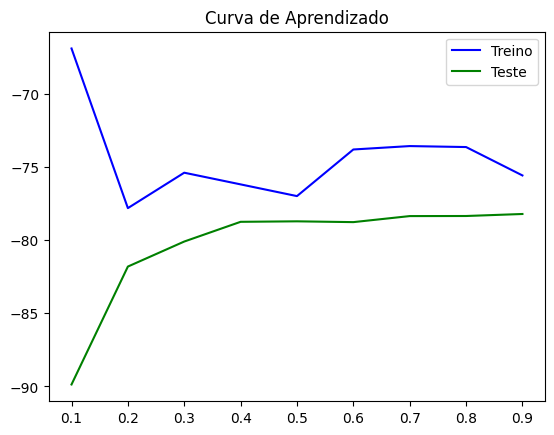

In [47]:
# Gerar Plot com Curva de Aprendizado
plt.plot(linspace(0.1, 0.9, 9), mean(train_scores, axis=1), color='b', label='Treino')
plt.plot(linspace(0.1, 0.9, 9), mean(test_scores, axis=1), color='g', label='Teste')
plt.title('Curva de Aprendizado')
plt.legend()
plt.show()

### Carregar Dados KNN

In [48]:
# Carregar o conjunto de dados
df2 = pd.read_csv('./datasets/fruit_quality.csv')

In [49]:
# Visualizar estrutura do conjunto de dados
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [50]:
# Ajustar DataFrame

# Remover a coluna 'Id'
df2.drop('A_id', axis=1, inplace=True)

df2['Quality'] = (df2['Quality'] == 'good').astype(int)

### Treinar Modelo de KNN com mudança de K

In [51]:
# Separar X e y
X = df2.drop('Quality', axis=1)
y = df2['Quality']

In [52]:
# Separar Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
# Faz o loop para treinar o modelo com diversas quantidades de vizinhos (k)
scores_train = []
scores_test = []
for i in range(1, 20, 2):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    scores_train.append(f1_score(y_train, y_train_pred))
    scores_test.append(f1_score(y_test, y_test_pred))

In [55]:
# Criar um Dataframe com os scores
df_results = pd.DataFrame({'k': range(1, 20, 2), 'train': scores_train, 'test': scores_test})

In [69]:
# Mostrar gráfico
xaxis = x = [i for i in range(1, 20, 2)]
fig = px.line(df_results, x='k', y=['train', 'test'], title='KNN - Overfitting')
fig.update_xaxes(tickvals=xaxis, ticktext=[str(i) for i in x])
fig.show()